<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

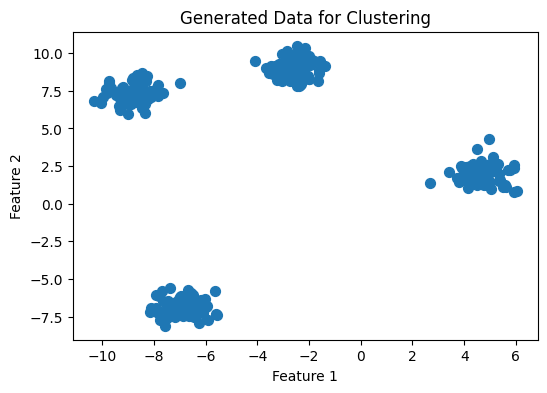

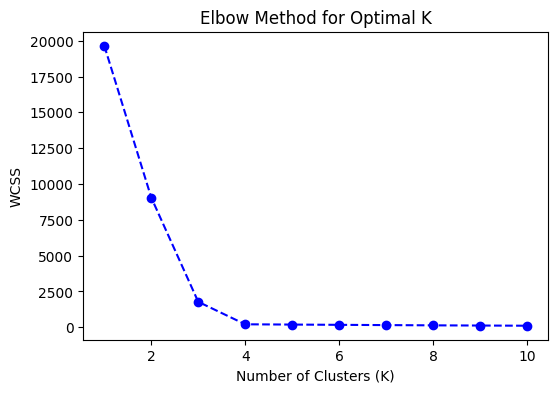

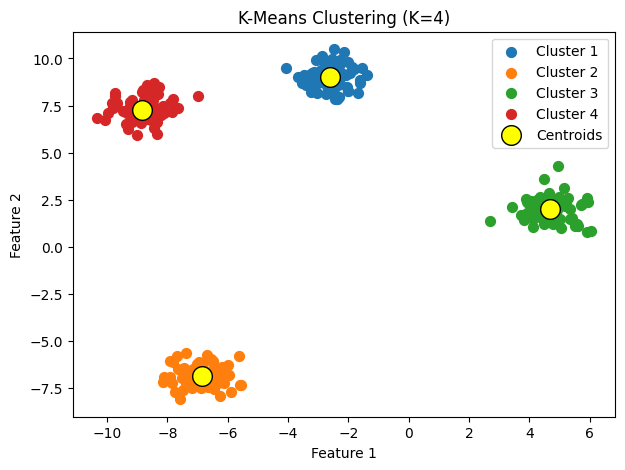

In [24]:
# K-MEANS Clustering with ELBOW METHOD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate Sample Data
# Creating synthetic 2D data with 4 cluster centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualize the generated data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: Find Optimal K (Elbow Method)
wcss = []
# Testing K values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

# Step 3: Apply K-Means with optimal K

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 4: Visualize the Clusters
plt.figure(figsize=(7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, label='Cluster 4')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', edgecolor='black', label='Centroids')

plt.title("K-Means Clustering (K=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [25]:
import numpy as np
from scipy.spatial.distance import cosine
from collections import Counter

# 1. Euclidean Distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# 2. Manhattan Distance
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# 3. Cosine Similarity
def cosine_similarity(x, y):
    return 1 - cosine(x, y)

# 4. Minkowski Distance
def minkowski_distance(x, y, p=3):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

# 5. Jaccard Index
def jaccard_index(x, y):
    intersection = len(set(x) & set(y))
    union = len(set(x) | set(y))
    return intersection / union

# Example usage
if __name__ == "__main__":
    # Sample Data Points
    x = np.array([1, 2, 3])
    y = np.array([7, 1, 6])

    print("Euclidean Distance: ", euclidean_distance(x, y))
    print("Manhattan Distance: ", manhattan_distance(x, y))
    print("Cosine Similarity: ", cosine_similarity(x, y))
    print("Minkowski Distance (p=3): ", minkowski_distance(x, y, p=3))

    # Jaccard Index Example (binary vectors)
    set_x = {1, 2, 3}
    set_y = {3, 5, 6}

    print("Jaccard Index: ", jaccard_index(set_x, set_y))


Euclidean Distance:  6.782329983125268
Manhattan Distance:  10
Cosine Similarity:  0.7781270639007172
Minkowski Distance (p=3):  6.248799769526243
Jaccard Index:  0.2


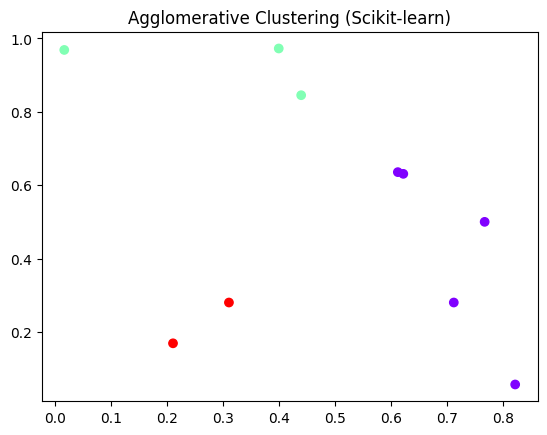

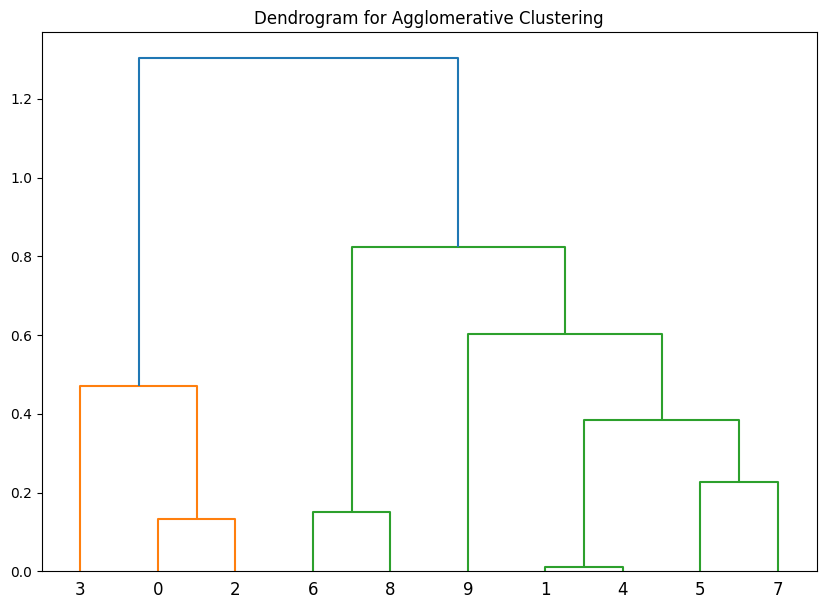

In [26]:
# Agglomerative Clustering Implementation with Scikit-learn
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample Data
X = np.random.rand(10, 2)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
labels = agglomerative.fit_predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Scikit-learn)")
plt.show()

# Dendrogram to visualize hierarchical structure
Z = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_birch.py:727: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


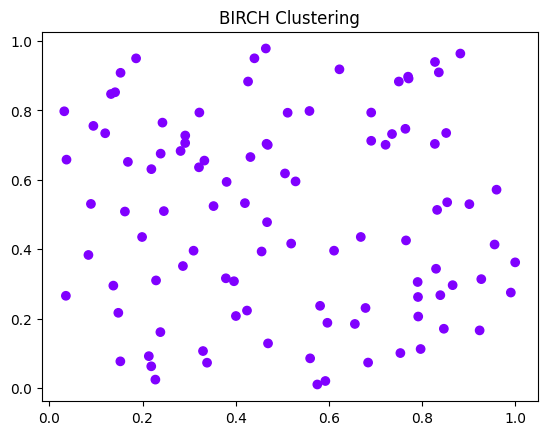

In [27]:
# BIRCH Example
from sklearn.cluster import Birch

# Sample Data
X = np.random.rand(100, 2)

# BIRCH Clustering
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels_birch, cmap='rainbow')
plt.title("BIRCH Clustering")
plt.show()


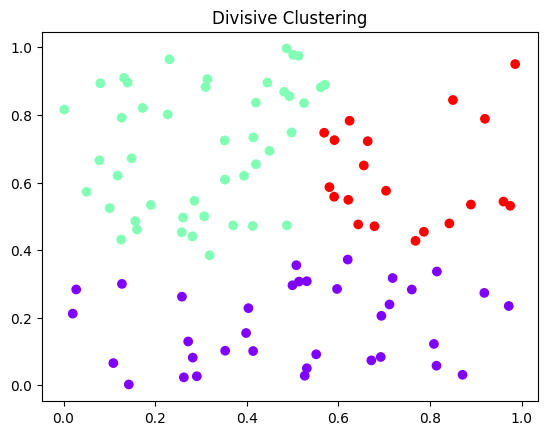

In [28]:
# Divisive Clustering

import numpy as np
from sklearn.cluster import AgglomerativeClustering

def divisive_clustering(X, n_clusters=3):
    # Start with all points in one cluster
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # Recursive splitting can be applied here as needed, in a more custom way
    labels = clustering.fit_predict(X)
    return labels

# Sample Data
X = np.random.rand(100, 2)
labels_divisive = divisive_clustering(X, n_clusters=3)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels_divisive, cmap='rainbow')
plt.title("Divisive Clustering")
plt.show()


In [29]:
import numpy as np
from scipy.spatial.distance import cdist

def single_linkage(cluster1, cluster2):
    """Minimum distance between points in cluster1 and cluster2"""
    distances = cdist(cluster1, cluster2)
    return np.min(distances)

def complete_linkage(cluster1, cluster2):
    """Maximum distance between points in cluster1 and cluster2"""
    distances = cdist(cluster1, cluster2)
    return np.max(distances)

def average_linkage(cluster1, cluster2):
    """Average distance between points in cluster1 and cluster2"""
    distances = cdist(cluster1, cluster2)
    return np.mean(distances)

def ward_linkage(cluster1, cluster2):
    """Ward linkage based on increase in total within-cluster variance"""
    n1 = cluster1.shape[0]
    n2 = cluster2.shape[0]

    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)

    dist = np.linalg.norm(centroid1 - centroid2)
    return np.sqrt((n1 * n2) / (n1 + n2)) * dist

def centroid_linkage(cluster1, cluster2):
    '''Distance between centroids of cluster1 and cluster2'''
    centroid1 = np.mean(cluster1, axis=0)
    centroid2 = np.mean(cluster2, axis=0)
    return np.linalg.norm(centroid1 - centroid2)

if __name__ == "__main__":
    # Sample clusters
    cluster_a = np.array([[1, 2], [2, 3], [3, 4]])
    cluster_b = np.array([[5, 5], [6, 6], [7, 7]])

    print("Single Linkage:", single_linkage(cluster_a, cluster_b))
    print("Complete Linkage:", complete_linkage(cluster_a, cluster_b))
    print("Average Linkage:", average_linkage(cluster_a, cluster_b))
    print("Ward's Linkage:", ward_linkage(cluster_a, cluster_b))
    print("Centroid Linkage:", centroid_linkage(cluster_a, cluster_b))



Single Linkage: 2.23606797749979
Complete Linkage: 7.810249675906654
Average Linkage: 5.007074297688902
Ward's Linkage: 6.123724356957945
Centroid Linkage: 5.0


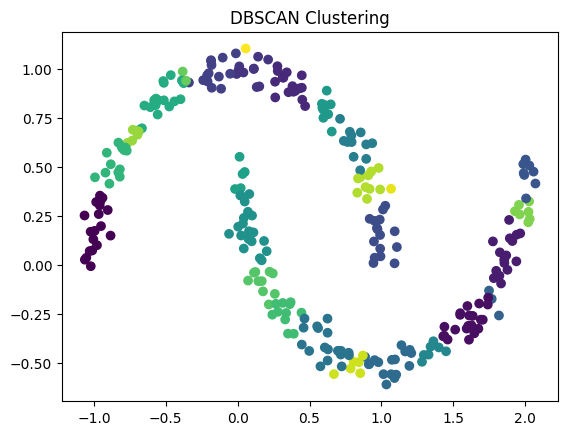

In [30]:
#DBSCAN Clustering
import numpy as np

def dbscan(X, eps, min_samples):
    n_points = X.shape[0]
    # Initialize all labels as -1
    labels = np.full(n_points, -1)
    cluster_id = 0

    # Function to find neighbors within eps radius
    def region_query(point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors

    # Function to expand cluster
    def expand_cluster(point_idx, neighbors):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = region_query(neighbor_idx)
                if len(neighbor_neighbors) >= min_samples:
                    neighbors = np.append(neighbors, neighbor_neighbors)
            i += 1

    for point_idx in range(n_points):
        if labels[point_idx] != -1:
            continue
        neighbors = region_query(point_idx)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            expand_cluster(point_idx, neighbors)
            cluster_id += 1

    return labels

if __name__ == "__main__":
    # Generate sample data
    from sklearn.datasets import make_moons
    import matplotlib.pyplot as plt

    X, _ = make_moons(n_samples=300, noise=0.05)

    labels = dbscan(X, eps=0.2, min_samples=5)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title("DBSCAN Clustering")
    plt.show()


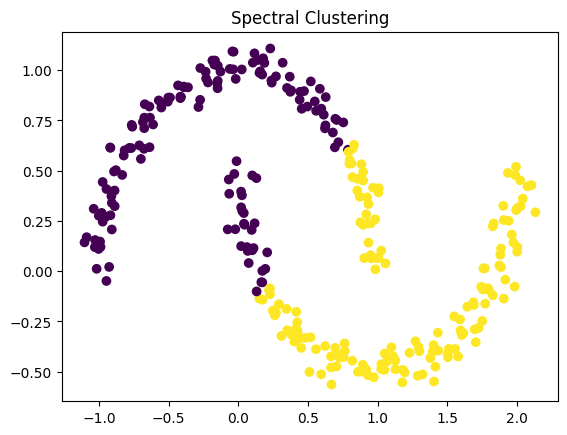

In [31]:
#Spectral Clustering
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def spectral_clustering(X, n_clusters, sigma=1.0):

    # Step 1: Compute similarity matrix using RBF kernel
    pairwise_dists = squareform(pdist(X, 'euclidean'))
    W = np.exp(-pairwise_dists**2 / (2 * sigma**2))

    # Step 2: Compute Degree matrix
    D = np.diag(W.sum(axis=1))

    # Step 3: Compute unnormalized graph Laplacian: L = D - W
    L = D - W

    # Step 4: Compute first k eigenvectors of the Laplacian matrix
    # eigh returns them sorted, smallest eigenvalues first
    eigvals, eigvecs = eigh(L, D)

    # Take the first n_clusters eigenvectors (smallest eigenvalues)
    U = eigvecs[:, :n_clusters]

    # Step 5: Normalize rows of U
    U_norm = U / np.linalg.norm(U, axis=1, keepdims=True)

    # Step 6: Cluster rows of U_norm using k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(U_norm)

    return labels

if __name__ == "__main__":
    from sklearn.datasets import make_moons

    # Create sample data
    X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

    # Perform spectral clustering
    labels = spectral_clustering(X, n_clusters=2, sigma=0.5)

    # Plot results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title("Spectral Clustering")
    plt.show()
